In [4]:
# VIZUALIZATION OF BEST PARAMETERS
import queue
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Crossover Rate VS Mutation Rate

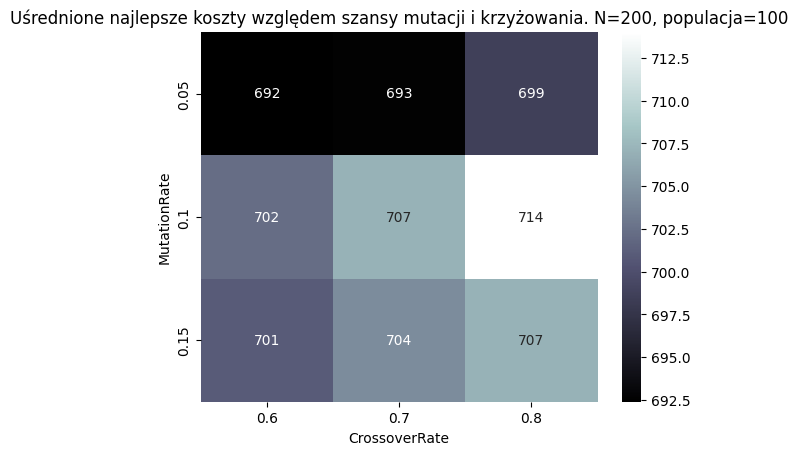

In [8]:
df = pd.read_csv('results/test_params.csv')

df_grouped = df.groupby(['MutationRate', 'CrossoverRate']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
).reset_index()

heatmap_data = df_grouped.pivot_table(
    index='MutationRate', 
    columns='CrossoverRate', 
    values='SolutionCostMean',
)

sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='bone',
            fmt='.0f')

plt.title('Uśrednione najlepsze koszty względem szansy mutacji i krzyżowania. N=200, populacja=100')
plt.show()

# CROSSOVER METHODS

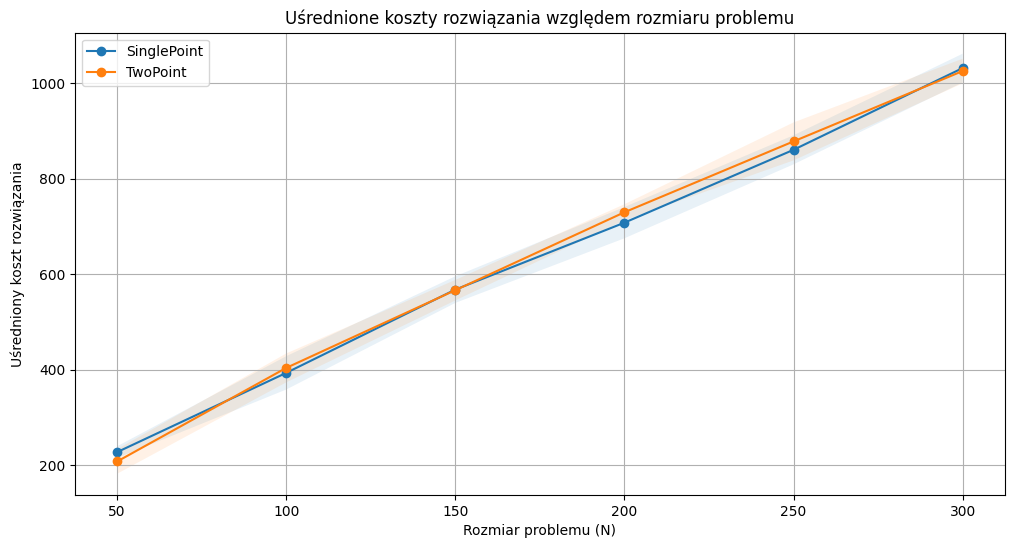

In [15]:
df = pd.read_csv('results/test_crossover.csv')
df_grouped = df.groupby(['N', 'CrossoverMethod']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
    SolutionCostStd=('SolutionCost', 'std'),
).reset_index()

X = df_grouped['N'].unique()
labels = df_grouped['CrossoverMethod'].unique()

plt.figure(figsize=(12, 6))

#scatter plot with line
for label in labels:
    y = df_grouped[df_grouped['CrossoverMethod'] == label]['SolutionCostMean']
    plt.plot(X, y, marker='o', label=label)
    
    #std
    std = df_grouped[df_grouped['CrossoverMethod'] == label]['SolutionCostStd']
    plt.fill_between(X, y - std, y + std, alpha=0.1)
plt.xticks(X)
    
plt.xlabel('Rozmiar problemu (N)')
plt.ylabel('Uśredniony koszt rozwiązania')
plt.title('Uśrednione koszty rozwiązania względem rozmiaru problemu')
plt.legend()
plt.grid(True)



plt.show()

# SELECTION METHODS

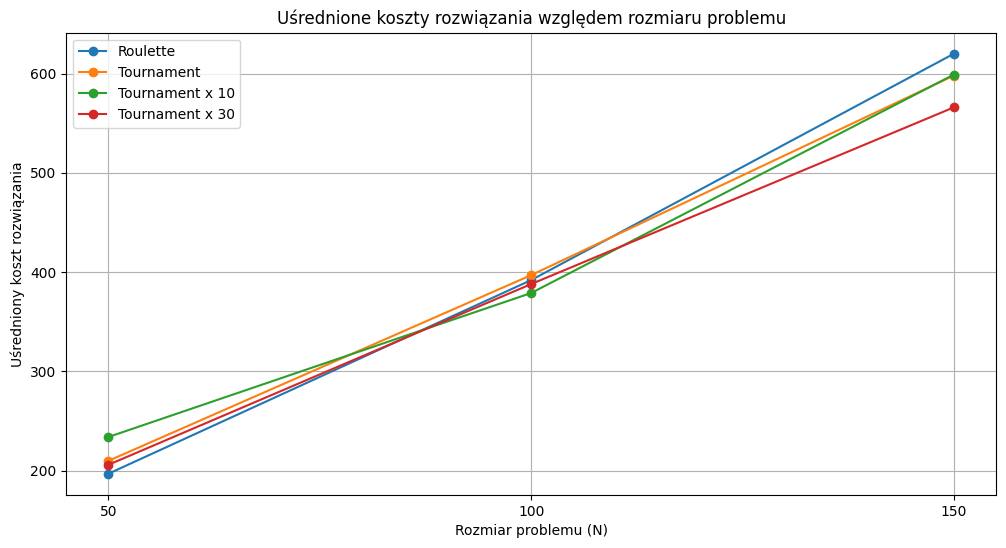

In [18]:
df = pd.read_csv('results/test_selection.csv')
df_grouped = df.groupby(['N', 'SelectionMethod']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
    SolutionCostStd=('SolutionCost', 'std'),
).reset_index()

X = df_grouped['N'].unique()
labels = df_grouped['SelectionMethod'].unique()

plt.figure(figsize=(12, 6))

#scatter plot with line
for label in labels:
    y = df_grouped[df_grouped['SelectionMethod'] == label]['SolutionCostMean']
    plt.plot(X, y, marker='o', label=label)
    
    #std
    std = df_grouped[df_grouped['SelectionMethod'] == label]['SolutionCostStd']
    plt.fill_between(X, y - std, y + std, alpha=0.1)
plt.xticks(X)
    
plt.xlabel('Rozmiar problemu (N)')
plt.ylabel('Uśredniony koszt rozwiązania')
plt.title('Uśrednione koszty rozwiązania względem rozmiaru problemu')
plt.legend()
plt.grid(True)



plt.show()